# Network visualization - AlexNet

This notebook is concerned with the visualization of neural network filters and their action on images. To begin with, we will see how we can load pre-trained models in PyTorch and how we can access and display their filters. We will then take a random image and show how we can pass it through the first few layers of the network and display the intermediate activations.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from skimage import data
from torchvision.utils import make_grid

torchvision_version = torchvision.__version__
print(f'torchvision_version {torchvision_version}')

if torchvision_version.split('.')[1] == '13':
    from torchvision.models import alexnet, AlexNet_Weights
    from torchvision.models.feature_extraction import get_graph_node_names, create_feature_extractor

torchvision_version 0.13.0


First of all let's load the AlexNet model

In [2]:
if torchvision_version.split('.')[1] != '13':
    # Torchvision < 0.13
    model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
else:
    # Torchvision 0.13
    model = alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Display filters

We can now display the filters of the first layer. Since the input is an RGB image (i.e., 3 channels), we can easily display such filters in RGB.

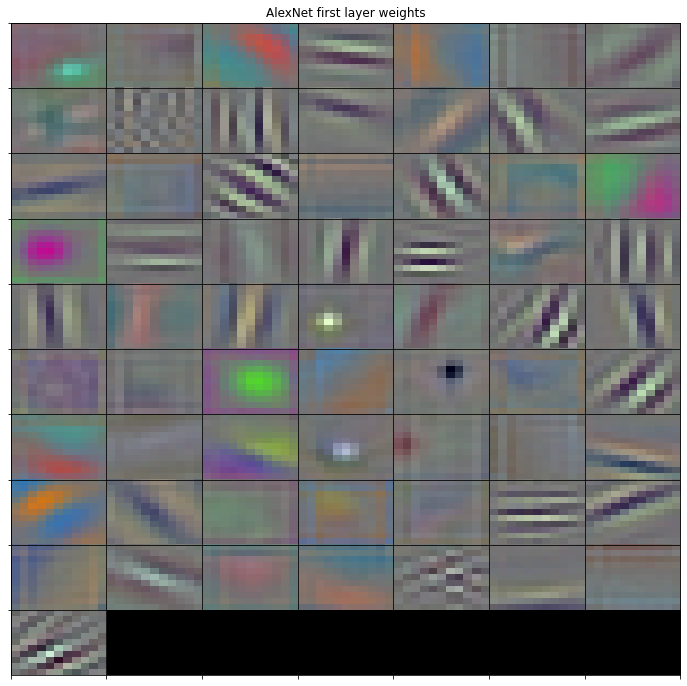

In [3]:
# First layer weights
weigths1 = model.features[0].weight
weigths1_grid = make_grid(weigths1, padding=0, nrow=7, normalize=True).numpy().transpose(1,2,0)
kern_size = weigths1.shape[2:]
            
plt.figure(figsize=(12, 12))
plt.imshow(weigths1_grid.squeeze())
plt.axis('tight')
plt.xticks(np.arange(0, kern_size[0]*10, kern_size[0]) - 0.5, [])
plt.yticks(np.arange(0, kern_size[1]*10, kern_size[1]) - 0.5, [])
plt.axis('tight')
plt.title('AlexNet first layer weights')
plt.grid('on', color='k')

## Display activations

Finally let's take a random image and pass it through the first layer

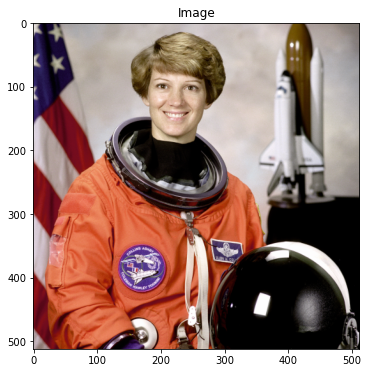

In [4]:
astronaut = data.astronaut()
plt.figure(figsize=(10, 6))
plt.imshow(astronaut)
plt.title("Image");

astronaut = torch.from_numpy(astronaut.transpose(2, 0, 1).astype(np.float32)).unsqueeze(0)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
)
torch.Size([1, 64, 127, 127])


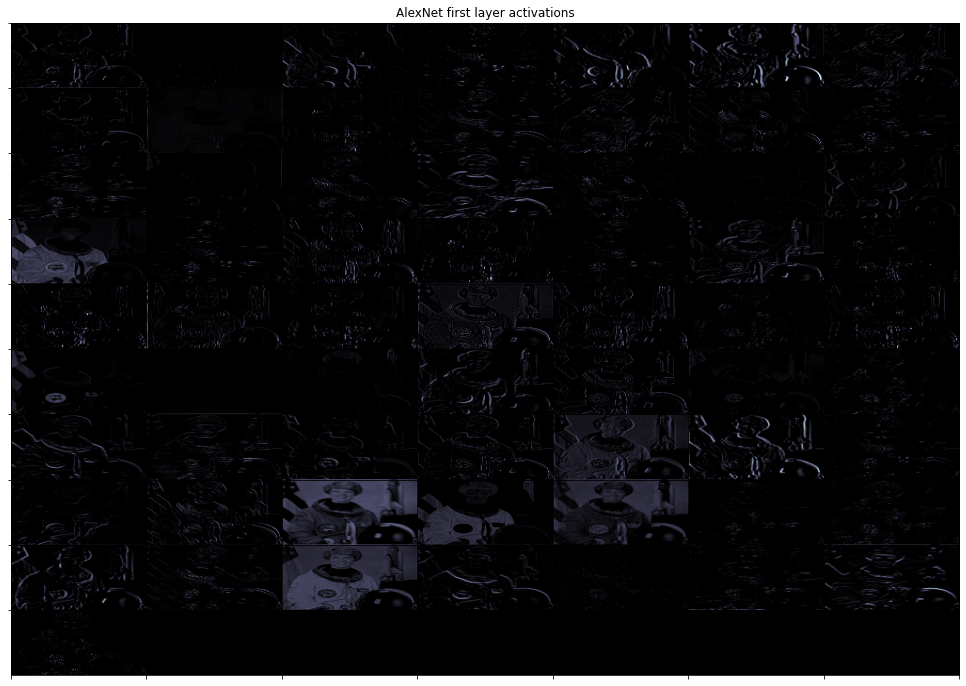

In [5]:
# Pass image through the first layer
first_layer = model.features[:2]
print(first_layer)
activations = first_layer(astronaut)
print(activations.shape)

activations_grid = make_grid(activations.transpose(0,1), padding=0, nrow=7, normalize=True).numpy()
activations_size = activations.shape[2:]
            
plt.figure(figsize=(17, 12))
plt.imshow(activations_grid[0].squeeze(), cmap='bone')
plt.axis('tight')
plt.xticks(np.arange(0, activations_size[0]*10, activations_size[0]) - 0.5, [])
plt.yticks(np.arange(0, activations_size[1]*10, activations_size[1]) - 0.5, [])
plt.axis('tight')
plt.title('AlexNet first layer activations')
plt.grid('on', color='k')

And the second layer

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)


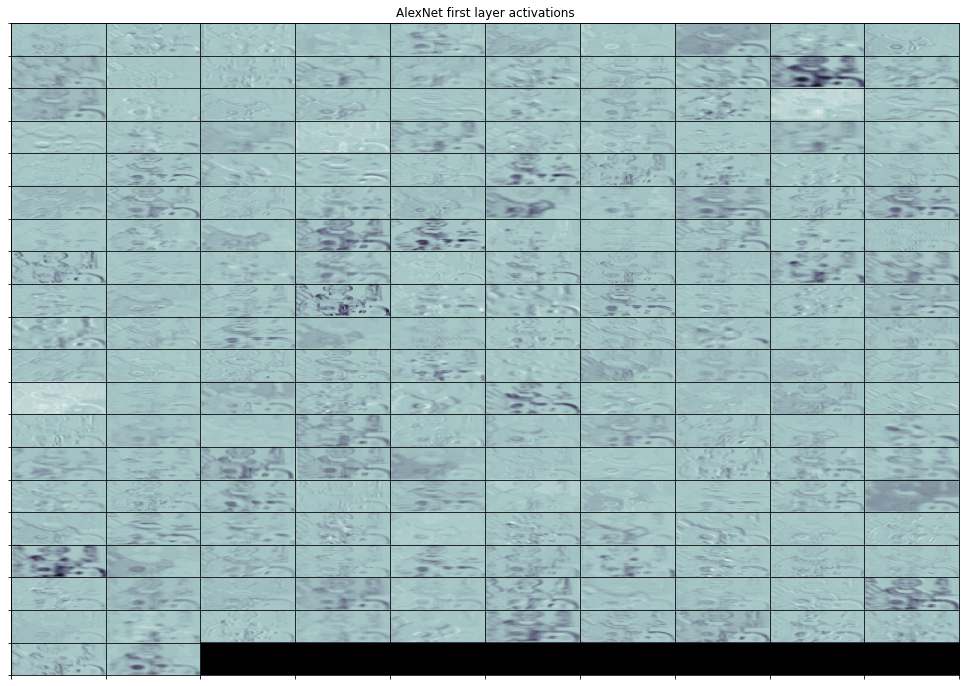

In [6]:
first_layer = model.features[:4]
print(first_layer)
activations = first_layer(astronaut)

activations_grid = make_grid(activations.transpose(0,1), padding=0, nrow=10, normalize=True).numpy()
activations_size = activations.shape[2:]
            
plt.figure(figsize=(17, 12))
plt.imshow(activations_grid[0].squeeze(), cmap='bone')
plt.axis('tight')
plt.xticks(np.arange(0, activations_size[0]*30, activations_size[0]) - 0.5, [])
plt.yticks(np.arange(0, activations_size[1]*30, activations_size[1]) - 0.5, [])
plt.axis('tight')
plt.title('AlexNet first layer activations')
plt.grid('on', color='k')

Whislt this is easy for simple models, things can get complicated very quickly. For this reason, PyTorch has developed a build-in system to allow users extract intermediate activations from any kind of network. Let's see how we can do it.

**NOTE**: the below code requires `torchvision>=0.13.0`

Nodes: ['x', 'features.0', 'features.1', 'features.2', 'features.3', 'features.4', 'features.5', 'features.6', 'features.7', 'features.8', 'features.9', 'features.10', 'features.11', 'features.12', 'avgpool', 'flatten', 'classifier.0', 'classifier.1', 'classifier.2', 'classifier.3', 'classifier.4', 'classifier.5', 'classifier.6']
Extracting features for nodes ['features.0', 'features.3', 'features.6']


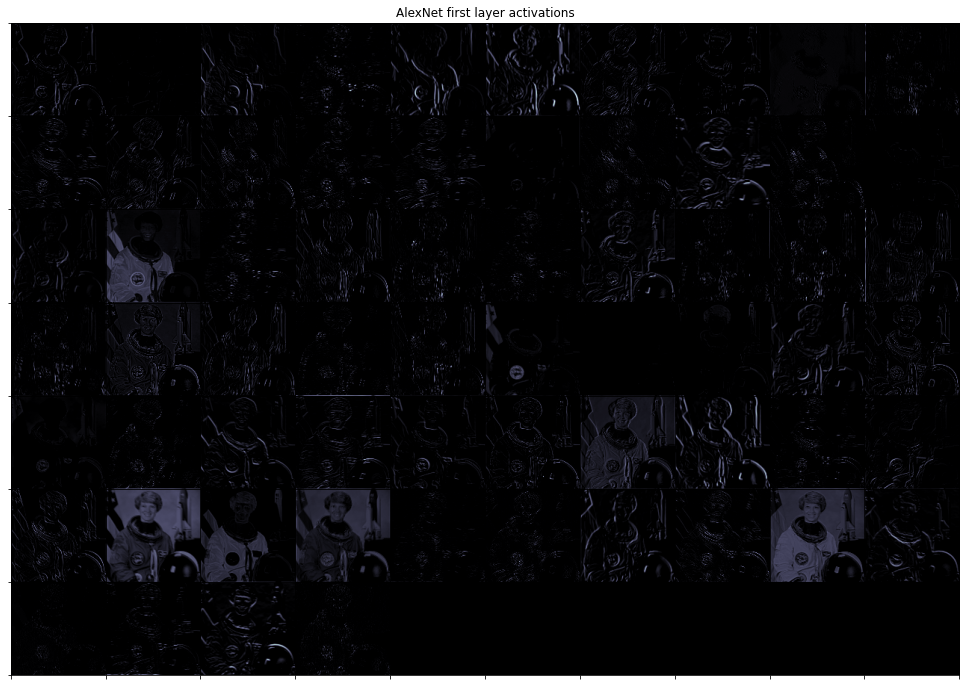

In [8]:
if torchvision_version.split('.')[1] == '13':
    nodes, _ = get_graph_node_names(model)
    print(f'Nodes: {nodes}')
    
    selected_nodes = nodes[1:8][::3]
    print(f'Extracting features for nodes {selected_nodes}')
    
    feature_extractor = create_feature_extractor(model, return_nodes=selected_nodes)
    activations = feature_extractor(astronaut)
    
    activations_grid = make_grid(activations[selected_nodes[0]].transpose(0,1), 
                                             padding=0, nrow=10, normalize=True).numpy()
    activations_size = activations[selected_nodes[0]].shape[2:]

    plt.figure(figsize=(17, 12))
    plt.imshow(activations_grid[0].squeeze(), cmap='bone')
    plt.axis('tight')
    plt.xticks(np.arange(0, activations_size[0]*30, activations_size[0]) - 0.5, [])
    plt.yticks(np.arange(0, activations_size[1]*30, activations_size[1]) - 0.5, [])
    plt.axis('tight')
    plt.title('AlexNet first layer activations')
    plt.grid('on', color='k')


## Other useful references

- Visualization: https://towardsdatascience.com/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e
- Activation extraction: https://pytorch.org/blog/FX-feature-extraction-torchvision/